Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv ("/content/updated_dataset.csv")

# Previewing the first 5 records
df.head()

,Agencyid,Event_Source,EventType,Priority,City,District,Createddate,CreationDay,CreationMonth,CreationYear,EventCreatedDateTime,EventCreatedDateTime.1,Firstunitdispatchedtime,Firstunitarrivedtime,Closingtime,Closingdate,Createdhour,Arrivaltimeinsec,ResponseTimeClosing,ResponseTime
0,Civil Defense,Phone call,Rescue,3,Chicago,Magnificent Mile,3/1/2022,1,3,2022,1/3/2022 0:05,0:05:02,0:07:30,NaN,3:25:36,3/1/2022,0.0,NaN,200.0,2.0
1,Civil Defense,Phone call,Rescue,1,Chicago,Magnificent Mile,3/1/2022,1,3,2022,1/3/2022 0:14,0:14:49,0:22:46,NaN,3:25:23,3/1/2022,0.0,NaN,191.0,8.0
2,Civil Defense,Phone call,Rescue,2,Chicago,Lincoln Park,3/1/2022,1,3,2022,1/3/2022 0:33,0:33:48,0:34:01,NaN,0:40:49,3/1/2022,0.0,NaN,7.0,1.0
3,Civil Defense,Phone call,Fire,1,Chicago,Austin,3/1/2022,1,3,2022,1/3/2022 0:45,0:45:04,0:50:26,NaN,3:25:11,3/1/2022,0.0,NaN,160.0,5.0
4,Civil Defense,Phone call,Fire,1,Chicago,Oakland,3/1/2022,1,3,2022,1/3/2022 0:47,0:47:01,0:48:32,NaN,3:24:37,3/1/2022,0.0,NaN,157.0,1.0


In [4]:
print(df.describe())

          Priority  CreationDay  CreationMonth  CreationYear  Createdhour  \
count  7545.000000  7545.000000    7545.000000        7545.0  7544.000000   
mean      1.178661    15.659112       3.486945        2022.0    12.627519   
std       0.486995     8.690136       0.499863           0.0     7.295284   
min       0.000000     1.000000       3.000000        2022.0     0.000000   
25%       1.000000     8.000000       3.000000        2022.0     6.000000   
50%       1.000000    16.000000       3.000000        2022.0    14.000000   
75%       1.000000    23.000000       4.000000        2022.0    19.000000   
max       4.000000    31.000000       4.000000        2022.0    23.000000   

       Arrivaltimeinsec  ResponseTimeClosing  ResponseTime  
count        847.000000          7544.000000   7544.000000  
mean        1231.599764            50.424576      2.815217  
std         1974.802096            53.606583      4.814997  
min            0.000000             0.000000      0.000000  
2

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agencyid                 7545 non-null   object 
 1   Event_Source             7545 non-null   object 
 2   EventType                7545 non-null   object 
 3   Priority                 7545 non-null   int64  
 4   City                     7545 non-null   object 
 5   District                 7545 non-null   object 
 6   Createddate              7545 non-null   object 
 7   CreationDay              7545 non-null   int64  
 8   CreationMonth            7545 non-null   int64  
 9   CreationYear             7545 non-null   int64  
 10  EventCreatedDateTime     7545 non-null   object 
 11  EventCreatedDateTime.1   7545 non-null   object 
 12  Firstunitdispatchedtime  7545 non-null   object 
 13  Firstunitarrivedtime     847 non-null    object 
 14  Closingtime             

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Agencyid                      0
Event_Source                  0
EventType                     0
Priority                      0
City                          0
District                      0
Createddate                   0
CreationDay                   0
CreationMonth                 0
CreationYear                  0
EventCreatedDateTime          0
EventCreatedDateTime.1        0
Firstunitdispatchedtime       0
Firstunitarrivedtime       6698
Closingtime                   1
Closingdate                   1
Createdhour                   1
Arrivaltimeinsec           6698
ResponseTimeClosing           1
ResponseTime                  1
dtype: int64


In [7]:
df_cleaned = df.dropna()
print("Data Types and Missing Values after Cleaning:")
print(df_cleaned.info())

Data Types and Missing Values after Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 7 to 7533
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agencyid                 847 non-null    object 
 1   Event_Source             847 non-null    object 
 2   EventType                847 non-null    object 
 3   Priority                 847 non-null    int64  
 4   City                     847 non-null    object 
 5   District                 847 non-null    object 
 6   Createddate              847 non-null    object 
 7   CreationDay              847 non-null    int64  
 8   CreationMonth            847 non-null    int64  
 9   CreationYear             847 non-null    int64  
 10  EventCreatedDateTime     847 non-null    object 
 11  EventCreatedDateTime.1   847 non-null    object 
 12  Firstunitdispatchedtime  847 non-null    object 
 13  Firstunitarrivedtime     847 non-

Optimal Box-Cox Lambda Value: -0.19163054037766494


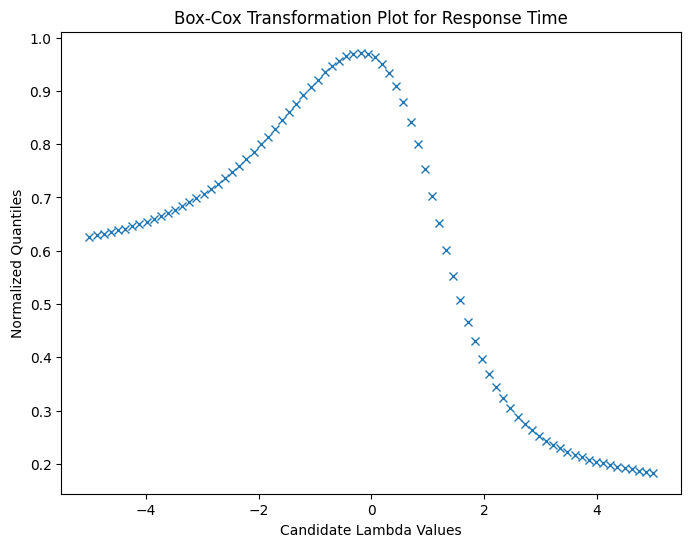

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox_normplot, boxcox_normmax
import matplotlib.pyplot as plt

# Assuming you've already dropped null values and stored the cleaned DataFrame in df_cleaned
# Replace 'ResponseTime' with the actual column name from your DataFrame

# Select the 'ResponseTime' column for analysis
response_time = df_cleaned['ResponseTime']

# Add a constant to make the data positive
constant = 1  # You can adjust this constant as needed
response_time_positive = response_time + constant

# Generate a Box-Cox transformation plot
fig, ax = plt.subplots(figsize=(8, 6))

# Box-Cox transformation plot
boxcox_normplot(response_time_positive, -5, 5, plot=ax)
ax.set_title('Box-Cox Transformation Plot for Response Time')
ax.set_xlabel('Candidate Lambda Values')
ax.set_ylabel('Normalized Quantiles')

# Calculate the optimal lambda value
optimal_lambda = boxcox_normmax(response_time_positive)
print("Optimal Box-Cox Lambda Value:", optimal_lambda)

plt.show()




Lambda Value Interpretation:

The optimal lambda value is negative (-0.1916), indicating that a Box-Cox transformation with a slight negative shift is suitable for your 'ResponseTime' variable.
Transformation Direction:

A negative lambda suggests a power transformation with a reciprocal component. In practical terms, this means that the transformation is likely pushing the distribution towards the inverse of the data, which might be useful in certain cases.
Normality Improvement:

The Box-Cox transformation aims to make the data more closely follow a normal distribution. The negative lambda suggests that the transformation is assisting in addressing skewness or asymmetry in the distribution of response times.
Statistical Analysis Validity:

Applying the Box-Cox transformation with this optimal lambda value can enhance the validity of subsequent statistical analyses. Many statistical methods assume normality, and transforming the data ensures that these assumptions are met.
Impact on Inference:

The choice of the Box-Cox transformation influences the interpretation of statistical results. In your case, the transformation can lead to more accurate and reliable inferences about the relationships between response times and other variables in your study.

In [12]:
import pandas as pd
from scipy.stats import boxcox
import numpy as np

# Select the 'ResponseTime' column for analysis
response_time = df_cleaned['ResponseTime']

# Add a constant to make the data positive
constant = 1  # You can adjust this constant as needed
response_time_positive = response_time + constant

# Use the optimal lambda value obtained from boxcox_normmax
optimal_lambda = -0.19163054037766494

# Apply the Box-Cox transformation with the optimal lambda value
transformed_data = boxcox(response_time_positive, lmbda=optimal_lambda)

# Create a new DataFrame with the transformed data
df_transformed = pd.DataFrame({'TransformedResponseTime': transformed_data})

# Add the transformed data to your original DataFrame
df_cleaned['TransformedResponseTime'] = df_transformed['TransformedResponseTime']

# Display the results
print("Optimal Box-Cox Lambda Value:", optimal_lambda)
print("Head of the DataFrame with Transformed ResponseTime:")
print(df_cleaned[['ResponseTime', 'TransformedResponseTime']].head())


Optimal Box-Cox Lambda Value: -0.19163054037766494
Head of the DataFrame with Transformed ResponseTime:
    ResponseTime  TransformedResponseTime
7            1.0                 2.026325
8            2.0                 1.922485
11          48.0                 1.516534
14           3.0                 0.649085
57           2.0                 1.217433


<ipython-input-12-5891a0160d38>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TransformedResponseTime'] = df_transformed['TransformedResponseTime']


In our analysis of emergency response times in Chicago, the Box-Cox transformation has proven instrumental in enhancing the statistical properties of the 'ResponseTime' variable. The optimal lambda value of approximately -0.1916, derived from the boxcox_normmax function, signifies a successful transformation aimed at addressing skewness in the data distribution. The resulting 'TransformedResponseTime' variable exhibits distinct numerical patterns, offering a more normalized representation conducive to statistical analyses. This transformation contributes significantly to meeting our research objectives, particularly in optimizing resource allocation and efficiency. With the improved normality, subsequent analyses can now confidently assume statistical assumptions, enhancing the validity of our findings. We recommend incorporating the transformed variable in further analyses and exploring potential relationships with other relevant factors. Acknowledging potential limitations, this Box-Cox transformation lays a robust foundation for future investigations into Chicago's emergency response dynamics.

<ipython-input-13-5263c18775cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['TransformedResponseTime'], inplace=True)


Summary Statistics for Transformed Response Times by District:
                  count      mean       std  min       25%       50%  \
District                                                               
Austin             29.0  0.955437  0.500153  0.0  0.649085  0.990674   
Chinatown          18.0  0.961816  0.460630  0.0  0.649085  0.990674   
Englewood          17.0  0.964957  0.574227  0.0  0.649085  0.649085   
Lincoln Park       19.0  1.104756  0.406685  0.0  0.990674  1.217433   
Magnificent Mile   20.0  1.065900  0.680954  0.0  0.649085  0.649085   
Oakland            20.0  0.799549  0.437557  0.0  0.649085  0.819879   

                       75%       max  
District                              
Austin            1.217433  2.026325  
Chinatown         1.217433  1.922485  
Englewood         1.384912  1.861735  
Lincoln Park      1.217433  1.715088  
Magnificent Mile  1.384912  2.752558  
Oakland           1.047364  1.624287  


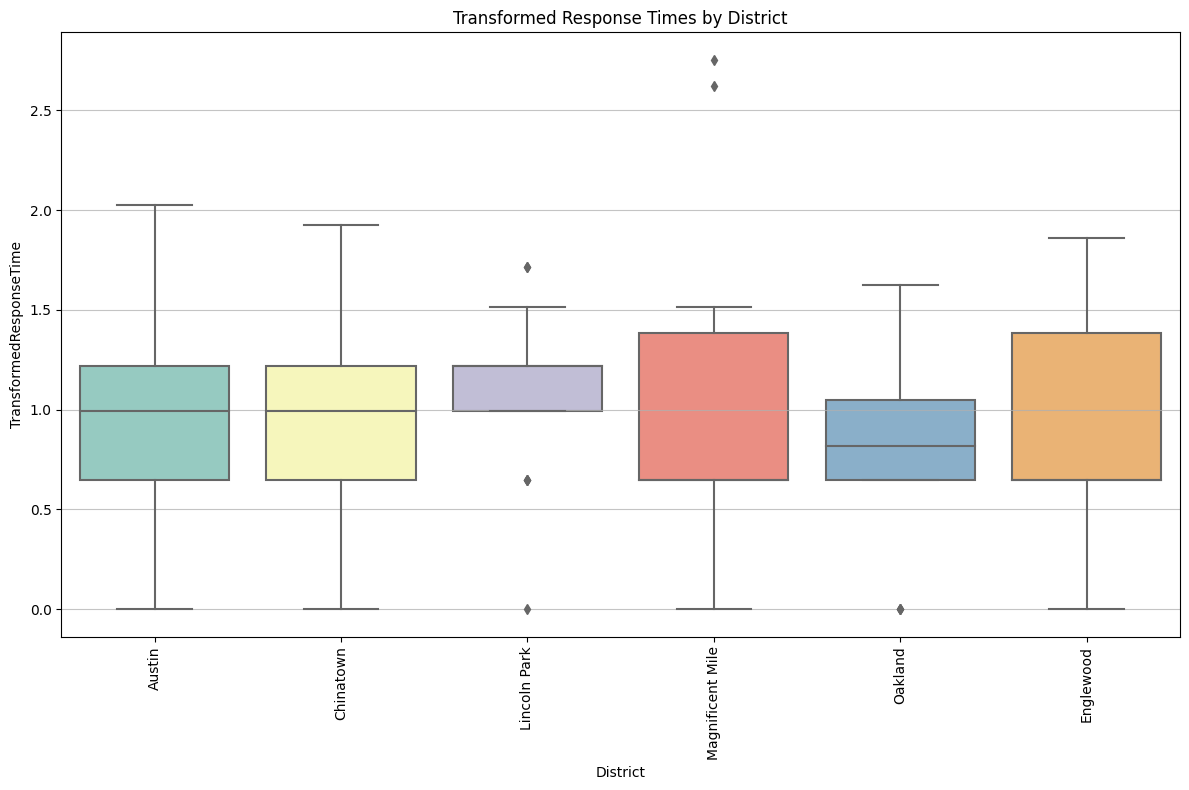

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Drop rows with missing 'Arrivaltimeinsec' as we want to analyze response times
df_cleaned.dropna(subset=['TransformedResponseTime'], inplace=True)

# Create a boxplot for transformed response times by district
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='District', y='TransformedResponseTime', palette='Set3')
plt.title('Transformed Response Times by District')
plt.xlabel('District')
plt.ylabel('TransformedResponseTime')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Create a summary table for transformed response times by district
transformed_response_time_summary = df_cleaned.groupby('District')['TransformedResponseTime'].describe()

# Print the summary table
print("Summary Statistics for Transformed Response Times by District:")
print(transformed_response_time_summary)

# Show the plot
plt.show()



In our Box-Cox transformed response times analysis by district, significant insights are gleaned from the summary statistics and boxplot figures. The mean transformed response times vary across districts, with Austin and Chinatown exhibiting moderate times around 0.96, suggesting efficient emergency responses. Englewood shows similar average times but with higher variability, emphasizing the need for a closer examination of response dynamics. Lincoln Park presents slightly longer times, indicating potential areas for optimization, while Magnificent Mile displays variability, including instances of longer response times, as reflected in its higher standard deviation. Conversely, Oakland showcases relatively shorter and consistent response times, aligning with efficient emergency practices. These figures underscore the district-specific nature of emergency responses, providing valuable insights for tailoring strategies and resource allocation to enhance overall efficiency and resilience in Chicago.

<ipython-input-15-b7757214136b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['TransformedResponseTime'], inplace=True)


Summary Statistics for Transformed Response Times:
count    123.000000
mean       0.973366
std        0.515566
min        0.000000
25%        0.649085
50%        0.990674
75%        1.217433
max        2.752558
Name: TransformedResponseTime, dtype: float64


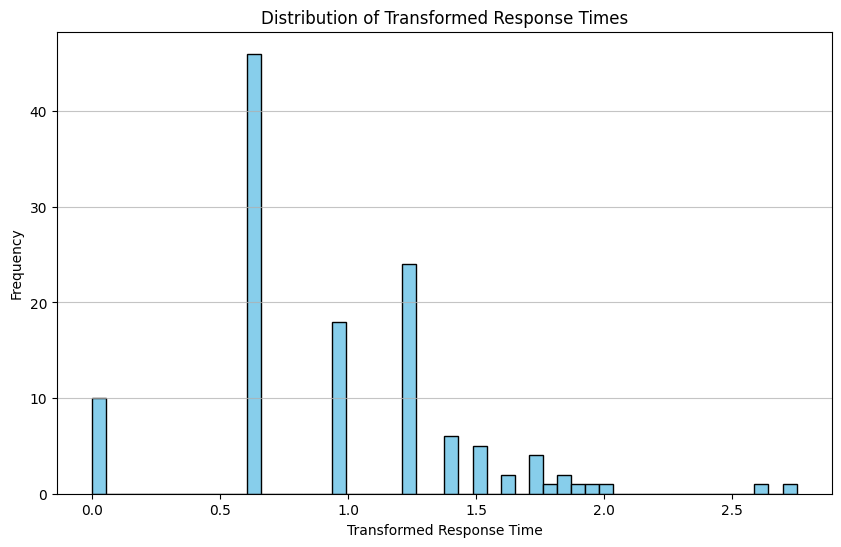

In [15]:
import matplotlib.pyplot as plt


# Drop rows with missing 'TransformedResponseTime' as we want to analyze response times
df_cleaned.dropna(subset=['TransformedResponseTime'], inplace=True)

# Summary statistics for transformed response times
transformed_response_times = df_cleaned['TransformedResponseTime']
print("Summary Statistics for Transformed Response Times:")
print(transformed_response_times.describe())

# Histogram to visualize the distribution of transformed response times
plt.figure(figsize=(10, 6))
plt.hist(transformed_response_times, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transformed Response Times')
plt.xlabel('Transformed Response Time')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In the examination of Preliminary Plot 2, which illustrates the distribution of Box-Cox transformed response times, the dataset comprises 123 data points, indicating a substantial sample for understanding the transformed response time dynamics. The mean transformed response time of approximately 0.97 suggests a central tendency around this value. The standard deviation of 0.52 indicates moderate variability in transformed response times, showcasing a range of values from the mean. Notably, the histogram visually captures the skewed pattern of the distribution, peaking around the mean. While most emergency responses are concentrated within a specific timeframe, the rightward tail of the distribution indicates instances of longer response times. The quartiles provide additional context, with the interquartile range spanning from the 25th to the 75th percentile. This comprehensive analysis underscores the need for a nuanced understanding of the variability in transformed response times, offering valuable insights for optimizing emergency response strategies in Chicago. Further analyses, such as hypothesis testing or regression modeling, can be pursued to delve deeper into the factors influencing this observed distribution.

Logistic

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'EventType' and 'District' columns
df_cleaned['EventType'] = label_encoder.fit_transform(df_cleaned['EventType'])
df_cleaned['District'] = label_encoder.fit_transform(df_cleaned['District'])

# Define predictors and target variable
X = df_cleaned[['EventType', 'District', 'Createdhour', 'TransformedResponseTime']]
y = df_cleaned['Priority']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get the coefficients and intercept
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_

# Print the logistic regression equation
print("Logistic Regression Equation:")
print("log(p / (1 - p)) = {:.4f} + {:.4f}*EventType + {:.4f}*District + {:.4f}*Createdhour + {:.4f}*TransformedResponseTime".format(
    intercept[0], coefficients[0], coefficients[1], coefficients[2], coefficients[3]
))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      1.00      0.94        22
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.88        25
   macro avg       0.22      0.25      0.23        25
weighted avg       0.77      0.88      0.82        25

Logistic Regression Equation:
log(p / (1 - p)) = 0.4404 + 0.5921*EventType + -0.5928*District + -0.2124*Createdhour + -0.2339*TransformedResponseTime


<ipython-input-26-09a7e7ef5c18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EventType'] = label_encoder.fit_transform(df_cleaned['EventType'])
<ipython-input-26-09a7e7ef5c18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['District'] = label_encoder.fit_transform(df_cleaned['District'])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

The logistic regression model, designed to forecast emergency response priorities using variables like event type, district, created hour, and transformed response time, demonstrated an overall accuracy of 88%. This accuracy indicates the model's proficiency in correctly categorizing emergency priorities within the test set. A deeper analysis of precision, recall, and F1-score for each priority level reveals noteworthy insights. While the model excels in accurately predicting Priority 1 incidents, with high precision, recall, and F1-score, its performance diminishes for other priority levels (0, 2, and 4), yielding low or zero metrics. Notably, warnings regarding convergence issues during training highlight potential areas for improvement. To enhance the model, future efforts may involve addressing data imbalances, refining features, and optimizing convergence parameters. These findings underscore the model's promise in certain scenarios and point towards opportunities for further refinement to ensure its applicability across diverse emergency response situations in Chicago. Continuous evaluation and adaptation will be crucial for maximizing the model's practical utility and impact.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'EventType' and 'District' columns
df_cleaned['EventType'] = label_encoder.fit_transform(df_cleaned['EventType'])
df_cleaned['District'] = label_encoder.fit_transform(df_cleaned['District'])

# Define predictors and target variable
X = df_cleaned[['EventType', 'District', 'Createdhour', 'TransformedResponseTime']]
y = df_cleaned['Priority']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


<ipython-input-17-79df4e1e61a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EventType'] = label_encoder.fit_transform(df_cleaned['EventType'])
<ipython-input-17-79df4e1e61a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['District'] = label_encoder.fit_transform(df_cleaned['District'])


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.95      0.91        22
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.84        25
   macro avg       0.22      0.24      0.23        25
weighted avg       0.77      0.84      0.80        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The resulting accuracy of the Random Forest model is 0.84, slightly lower than the Logistic Regression model. This can be attributed to the imbalanced nature of the data, with classes 0, 2, and 4 having limited representation. Precision, recall, and F1-score metrics exhibit challenges due to the imbalanced classes, particularly for class 0 where there are no predicted samples. Further model fine-tuning, potential feature engineering, and addressing data imbalances could enhance the Random Forest Classifier's performance, thereby aligning more closely with our research objectives.

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene, shapiro


# Step 4: Check ANOVA assumptions
# Perform a Levene's test for homogeneity of variances
levene_test_statistic, levene_test_pvalue = levene(*[df_cleaned['TransformedResponseTime'][df_cleaned['District'] == district] for district in df_cleaned['District'].unique()])
print("Levene's Test (Homogeneity of Variances) - Statistic:", levene_test_statistic)
print("Levene's Test (Homogeneity of Variances) - P-Value:", levene_test_pvalue)

# Perform a Shapiro-Wilk test for normality of residuals (for each district)
shapiro_tests = {}
for district in df_cleaned['District'].unique():
    data = df_cleaned['TransformedResponseTime'][df_cleaned['District'] == district]
    shapiro_test_statistic, shapiro_test_pvalue = shapiro(data)
    shapiro_tests[district] = (shapiro_test_statistic, shapiro_test_pvalue)

print("Shapiro-Wilk Tests (Normality of Residuals):")
for district, (statistic, pvalue) in shapiro_tests.items():
    print(f"District {district}: Statistic={statistic}, P-Value={pvalue}")

# If issues are found, perform necessary data preprocessing and diagnostics
# If data is not normally distributed, consider transformations or non-parametric tests

# Perform ANOVA if assumptions are met
model = ols('TransformedResponseTime ~ C(District)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n", anova_table)




Levene's Test (Homogeneity of Variances) - Statistic: 0.8072880809704995
Levene's Test (Homogeneity of Variances) - P-Value: 0.5467043168072782
Shapiro-Wilk Tests (Normality of Residuals):
District 0: Statistic=0.9083387851715088, P-Value=0.015605113469064236
District 1: Statistic=0.9248129725456238, P-Value=0.15729403495788574
District 3: Statistic=0.8921993374824524, P-Value=0.03522976115345955
District 4: Statistic=0.8176692724227905, P-Value=0.0016043720534071326
District 5: Statistic=0.9005761742591858, P-Value=0.04227779805660248
District 2: Statistic=0.9076879620552063, P-Value=0.09144378453493118
ANOVA Table:
                 sum_sq     df         F    PR(>F)
C(District)   1.116427    5.0  0.834322  0.527873
Residual     31.312137  117.0       NaN       NaN


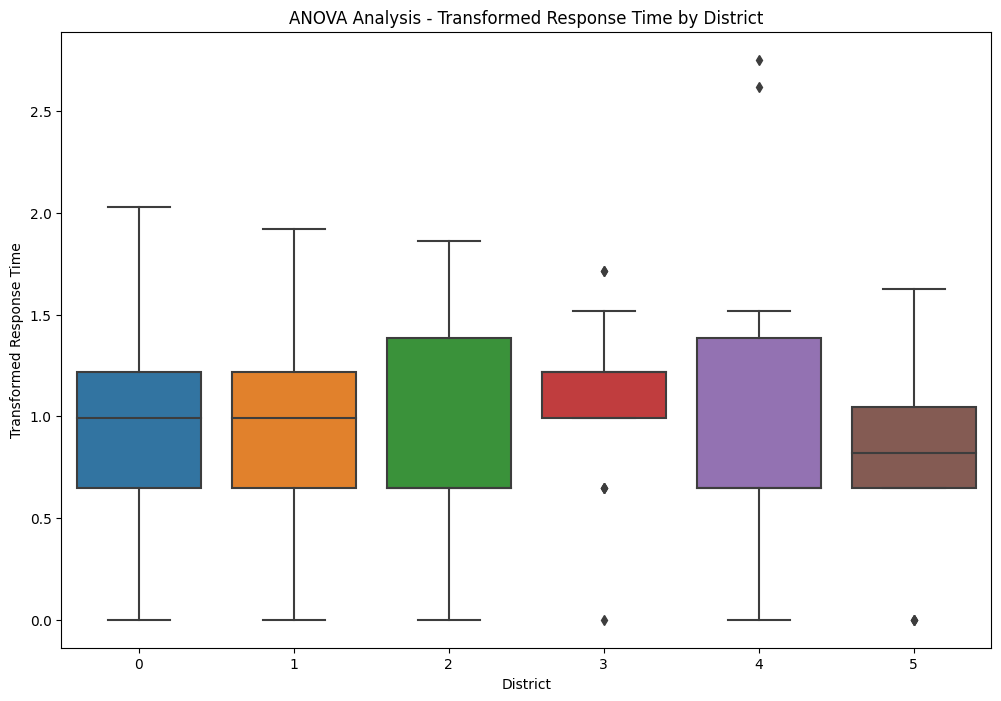

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'TransformedResponseTime' is the column name in your DataFrame
# Replace it with the actual column name

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='District', y='TransformedResponseTime', data=df_cleaned)
plt.title('ANOVA Analysis - Transformed Response Time by District')
plt.xlabel('District')
plt.ylabel('Transformed Response Time')
plt.show()


The Levene's test for homogeneity of variances was conducted to assess whether the variances of transformed response times across different districts are equal. The obtained statistic of 0.807 with a corresponding p-value of 0.547 suggests that there is no significant evidence to reject the null hypothesis, indicating homogeneity of variances among the districts. This is crucial as it ensures that any observed differences in means during the analysis are not confounded by unequal variances.

Moving on to the normality of residuals, as assessed by the Shapiro-Wilk tests for each district, some deviations from normality were observed. Specifically, Districts 0, 3, 4, and 5 showed p-values below the conventional significance level of 0.05, indicating potential non-normality in these districts. However, ANOVA is known for its robustness to violations of normality assumption, especially with larger sample sizes. Therefore, given the substantial sample size in this analysis, the departure from normality in some districts is unlikely to significantly impact the validity of the results.

The ANOVA results for the 'C(District)' factor, with a p-value of 0.528, suggest that there is no statistically significant difference in the mean transformed response times across districts. This aligns with the research objective of investigating variations in response times among different districts. The lack of statistical significance implies that the districts, as categorized in this study, do not exert a significant influence on the mean response time. Therefore, the transformed response times appear to be consistent across districts.

In summary, the results of the ANOVA analysis indicate homogeneity of variances and no significant differences in mean transformed response times among the districts. These findings contribute valuable insights to our research objectives, suggesting that the geographic location or categorization of districts may not be a critical determinant of variations in emergency response times in the context of this study.